In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('3.12.+Example.csv')
data.head(2)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28


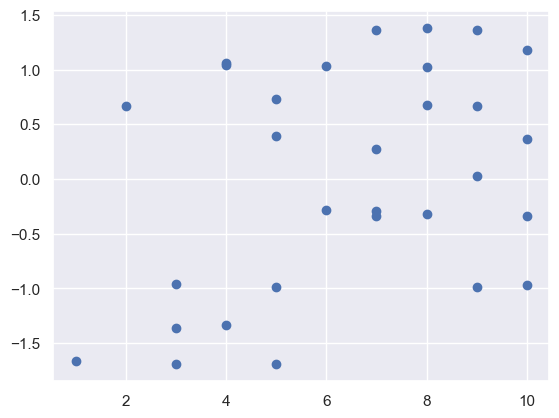

In [4]:
plt.scatter(data['Satisfaction'],data['Loyalty'])

In [5]:
kmeans=KMeans(2)
kmeans.fit(data)

KMeans(n_clusters=2)

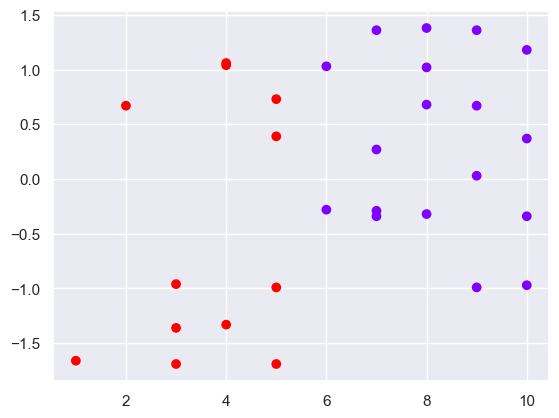

In [6]:
clusters = kmeans.fit_predict(data)
plt.scatter(data['Satisfaction'],data['Loyalty'],c = clusters, cmap = 'rainbow')

In [7]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(data)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [8]:
# Createa an empty list
wcss = []

# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1,10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i,random_state=42, max_iter=500, n_init=20,)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result
wcss

[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.464232350204886,
 4.3877896288930005,
 3.687975963852466]

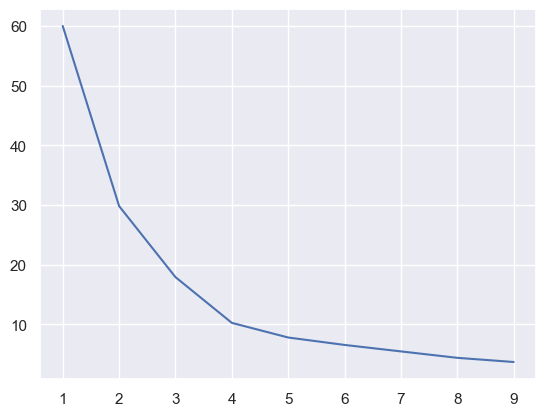

In [9]:
plt.plot(range(1,10),wcss)

In [10]:
# The x data can be original but the data we want to fit to "KMeans" should be scalled
# Above curves are at 2,3,4,5 


# Lets try 2(first result of curve) in KMeans
# We tried 2 and it was not so informative
# Using 4 and 5 shows alot information
# So we are using 4

kmeans = KMeans(4)
kmeans.fit(x_scaled)
clusters = kmeans.fit_predict(x_scaled)

x_new = data
x_new['Clusters'] = clusters
x_new.head(2)

,Satisfaction,Loyalty,Clusters
0,4,-1.33,1
1,6,-0.28,3


Text(0, 0.5, 'Loyalty')

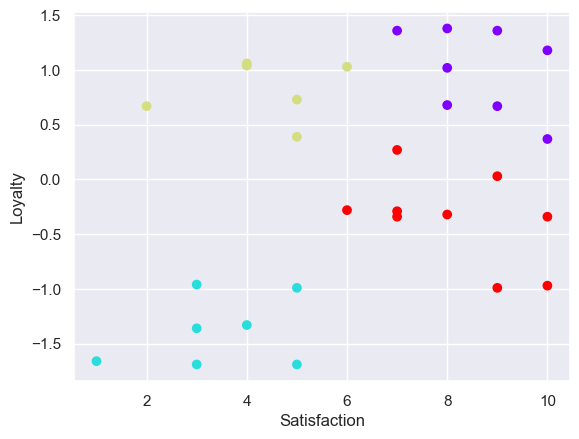

In [24]:
plt.scatter(x_new['Satisfaction'],x_new['Loyalty'],c =x_new['Clusters'], cmap='rainbow' )
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

## Above are 4 type of clusters 
## If we seprate the graph in 4 parts then 
## Lower left corner is "Low Satisfaction and low Loyalty" (the sky cluster) called "Alienated"
## Top left corner is "Low Satisfaction and High Loyalty" (the green cluster) called "Supporters"
## Top right corner is "High Satisfaction and High Loyalty" (the purple cluster) called "Fans".
## Lower right corner is "High Satisfaction and Low Loyalty" (the red cluster) called "romers".